# 3章 ニューラルネットワーク

## 活性化関数

### ステップ関数の実装

#### 実数が引数の場合

In [1]:
def real_step_function(x):
    if x > 0:
        return 1
    else:
        return 0

print(real_step_function(-1.0))
print(real_step_function(-0.5))
print(real_step_function(0))
print(real_step_function(0.5))
print(real_step_function(1.0))

0
0
0
1
1


#### Numpyの配列が引数の場合

In [2]:
import numpy as np

def nparray_step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.arange(-1, 1.1, 0.5)
print(nparray_step_function(x))

[0 0 0 1 1]


### ステップ関数のグラフ

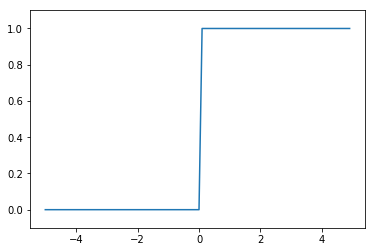

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数の実装

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[ 0.26894142  0.73105858  0.88079708]


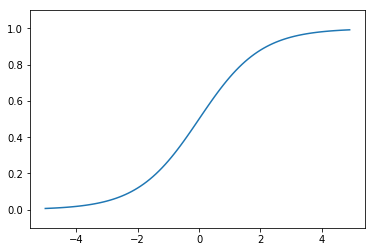

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### ステップ関数とシグモイド関数の比較

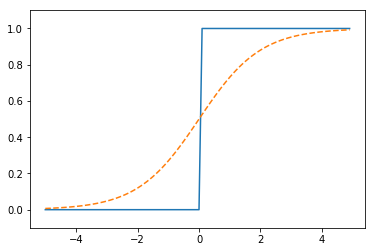

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1)
plt.plot(x, y2, linestyle = "--")
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU関数

In [8]:
def relu(x):
    return np.maximum(0, x)

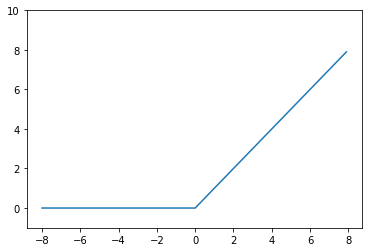

In [9]:
x = np.arange(-8, 8, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 10)
plt.show()

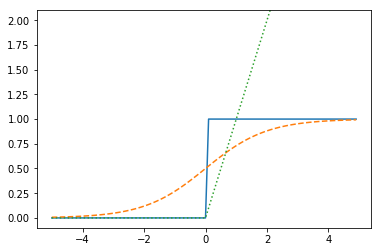

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
y3 = relu(x)
plt.plot(x, y1)
plt.plot(x, y2, linestyle = "--")
plt.plot(x, y3, linestyle = ":")
plt.ylim(-0.1, 2.1)
plt.show()

## 多次元配列の計算

### 多次元配列

In [11]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [12]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 行列の内積

In [13]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [14]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [15]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
print(np.dot(C, A))

(2, 2)
(2, 3)
[[ 9 12 15]
 [19 26 33]]


In [16]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### ニューラルネットワークの内積

In [17]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(X)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[1 2]
(2, 3)
[ 5 11 17]


## 3層ニューラルネットワークの実装

In [18]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


In [19]:
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [20]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 実装のまとめ

In [22]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


### [番外編] 関数を交換できる実装にする
http://qiita.com/rkosaka/items/60105faf86be1fa1d750#%E7%95%AA%E5%A4%96%E7%B7%A8-%E9%96%A2%E6%95%B0%E3%82%92%E4%BA%A4%E6%8F%9B%E3%81%A7%E3%81%8D%E3%82%8B%E5%AE%9F%E8%A3%85%E3%81%AB%E3%81%99%E3%82%8B

In [23]:
def start_network(X, W, B, h):
    A = np.dot(X, W) + B
    Z = h(A)
    return Z


X = np.array([0.1, 0.2])
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
B = np.array([0.1, 0.2, 0.3])
Z = start_network(X, W, B, sigmoid)
print('sigmoid->')
print(Z)
Z = start_network(X, W, B, relu)
print('ReLU->')
print(Z)

sigmoid->
[ 0.54735762  0.57932425  0.61063923]
ReLU->
[ 0.19  0.32  0.45]


### [番外編] 再利用可能な形にリファクタリング
http://qiita.com/rkosaka/items/60105faf86be1fa1d750#%E7%95%AA%E5%A4%96%E7%B7%A8%E5%86%8D%E5%88%A9%E7%94%A8%E5%8F%AF%E8%83%BD%E3%81%AA%E5%BD%A2%E3%81%AB%E3%83%AA%E3%83%95%E3%82%A1%E3%82%AF%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0

In [24]:
# 信号伝達処理(3層分)
def eval_3_network(X, network, h):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    Z1 = eval_single_network(X, W1, B1, h)
    Z2 = eval_single_network(Z1, W2, B2, h)
    Z3 = eval_single_network(Z2, W3, B3, identity_function)
    return Z3

# 信号伝達処理(1層分)
def eval_single_network(X, W, B, h):
    A = np.dot(X, W) + B
    Z = h(A)
    return Z

# 重みの行列を設定する
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.2], [0.3, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    return network

network = init_network()
X = np.array([0.1, 0.2])
print('sigmoid->')
Y = eval_3_network(X, network, sigmoid)
print(Y)
print('step->')
Y = eval_3_network(X, network, step_function)
print(Y)
print('ReLU->')
Y = eval_3_network(X, network, relu)
print(Y)

sigmoid->
[ 0.37908796  0.61567478]
step->
[ 0.5  0.8]
ReLU->
[ 0.3348  0.5424]


## 出力層の設計

### ソフトマックス関数

In [25]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [26]:
print('softmax->')
Y = eval_3_network(X, network, softmax)
print(Y)

softmax->
[ 0.3099668  0.5099668]


## 手書き数字認識

### MNISTデータセット

In [36]:
import sys, os
os.chdir('./deep-learning-from-scratch/ch03')
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
os.chdir('../../')

In [37]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

In [53]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)
print(x_train[0].shape)
print(t_train[0])

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(784,)
5


In [54]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


### ニューラルネットワークの推論処理

In [57]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('./deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()

accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_count += 1

print("Accuracy:" + str(float(accuracy_count) / len(x)))

Accuracy:0.9352


### 関数を変えられる仕様
http://qiita.com/rkosaka/items/87df0977d62714dfecba#%E9%A0%86%E6%96%B9%E5%90%91%E4%BC%9D%E6%92%AD%E3%81%AE%E5%AE%9F%E8%A1%8C

In [70]:
# 3層の順方向伝播
def eval_3_network(X, network, h, o):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    Z1 = eval_single_network(X, W1, B1, h)
    Z2 = eval_single_network(Z1, W2, B2, h)
    Z3 = eval_single_network(Z2, W3, B3, o)
    return Z3

# 学習済み重みを読み込む
def load_trained_network():
    with open('./deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

# テストデータを読み込む
def load_test_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

network = load_trained_network()
x, t = load_test_data()
ok_cnt = 0
for i in range(len(x)):
    y = eval_3_network(x[i], network, sigmoid, softmax)
    p = np.argmax(y)
    if p == t[i]:
        ok_cnt += 1
print("data_num:" + str(len(x)))
print("ok_count:" + str(ok_cnt))
print("Accuracy:" + str(float(ok_cnt) / len(x)))

data_num:10000
ok_count:9352
Accuracy:0.9352


### バッチ処理

In [71]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [72]:
x, _ = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i + batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### バッチ処理を追加した関数を変えられる仕様

In [73]:
# 3層の順方向伝播
def eval_3_network(X, network, h, o):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    Z1 = eval_single_network(X, W1, B1, h)
    Z2 = eval_single_network(Z1, W2, B2, h)
    Z3 = eval_single_network(Z2, W3, B3, o)
    return Z3

# 学習済み重みを読み込む
def load_trained_network():
    with open('./deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

# テストデータを読み込む
def load_test_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

network = load_trained_network()
x, t = load_test_data()
ok_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = eval_3_network(x_batch, network, sigmoid, softmax)
    p = np.argmax(y_batch, axis = 1)
    ok_cnt += np.sum(p == t[i:i + batch_size])

print("data_num:" + str(len(x)))
print("ok_count:" + str(ok_cnt))
print("Accuracy:" + str(float(ok_cnt) / len(x)))

data_num:10000
ok_count:9352
Accuracy:0.9352
